# Order Prediction with Machine Learning

Predictive modeling is a technique that uses mathematical and computational methods to predict an event or outcome. A mathematical approach uses an equation-based model that describes the phenomenon under consideration.
 
 
 

 

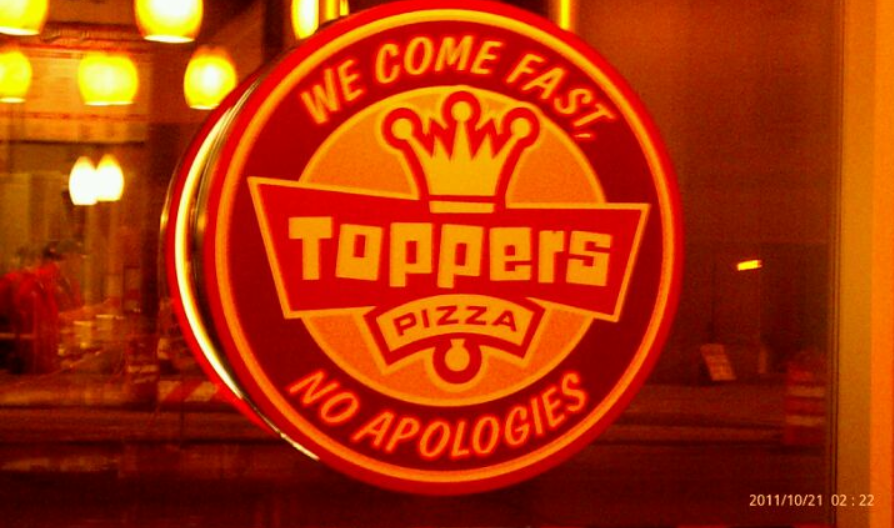

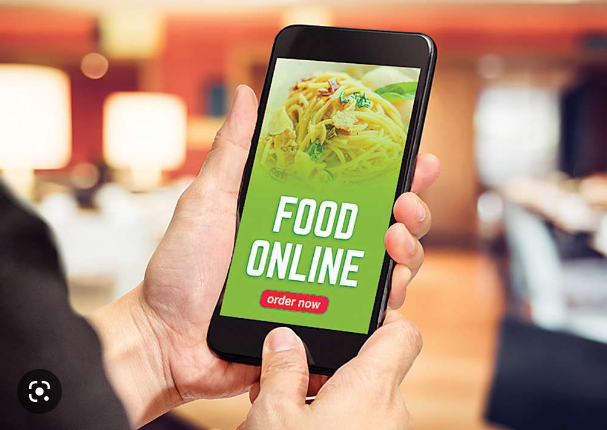

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential

sns.set_theme(style="whitegrid")

In [3]:
%matplotlib.inline()
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib.inline()` not found.


In [4]:
data = pd.read_excel(r"C:\Users\OFF-LAPTOP\Desktop\onlinefoods (4).xlsx")

In [5]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,32,Female,Prefer not to say,House wife,No Income,Graduate,5,12.9820,77.6256,560008,No,Negative
1,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,No,Negative
2,25,Male,Single,Student,No Income,Graduate,4,12.8988,77.5764,560078,No,Negative
3,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,No,Negative
4,19,Male,Single,Student,No Income,Graduate,2,13.0019,77.5713,560003,No,Negative


In [19]:
Sdata.info()s

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [20]:
data.shape

(388, 12)

In [21]:
data.ndim

2

In [22]:
data.info

<bound method DataFrame.info of      Age  Gender     Marital Status      Occupation  Monthly Income  \
0     32  Female  Prefer not to say      House wife       No Income   
1     23  Female             Single         Student       No Income   
2     25    Male             Single         Student       No Income   
3     23  Female             Single         Student       No Income   
4     19    Male             Single         Student       No Income   
..   ...     ...                ...             ...             ...   
383   22  Female             Single         Student  10001 to 25000   
384   24    Male             Single         Student  10001 to 25000   
385   24  Female             Single         Student  10001 to 25000   
386   32    Male            Married  Self Employeed  10001 to 25000   
387   22    Male            Married  Self Employeed  10001 to 25000   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                     Graduate       

In [23]:
data.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object

* This dataset has 13 columns.

* Out of 13 columns 8 columns are Object type and rest are Numeric type.

In [24]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [25]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

this dataset dosen't have null values.

In [26]:
data.corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.169982,0.006595,0.047500,0.137294
Family size,0.169982,1.000000,-0.053537,0.070126,-0.009402
latitude,0.006595,-0.053537,1.000000,-0.144234,-0.201813
longitude,0.047500,0.070126,-0.144234,1.000000,0.156119
Pin code,0.137294,-0.009402,-0.201813,0.156119,1.000000


<AxesSubplot:>

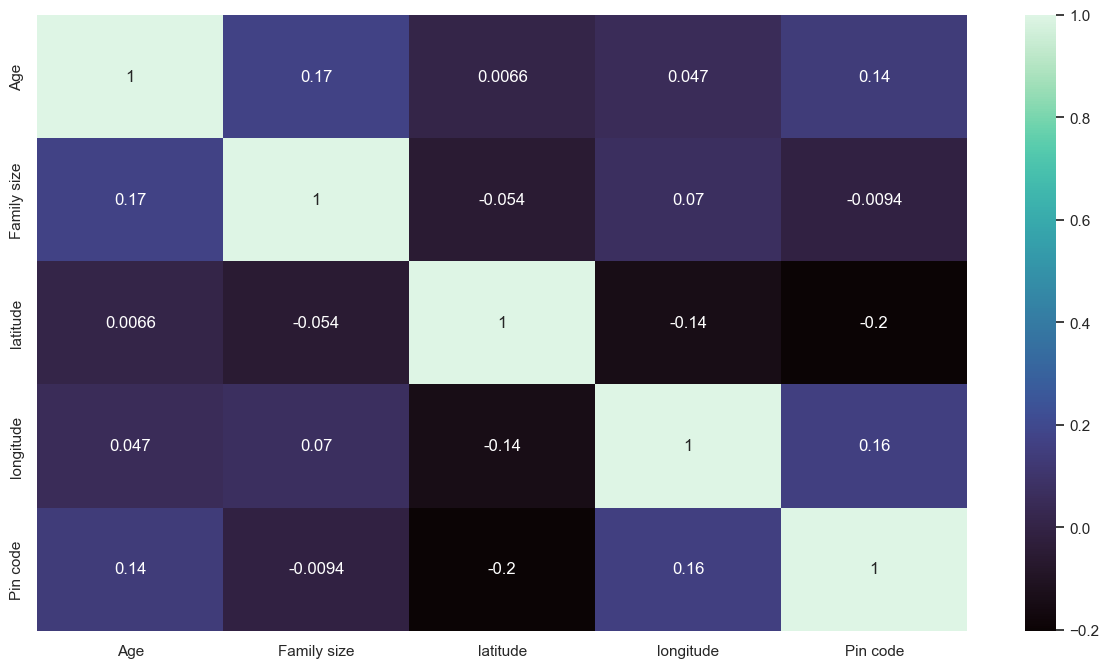

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot = True, cmap = "mako")

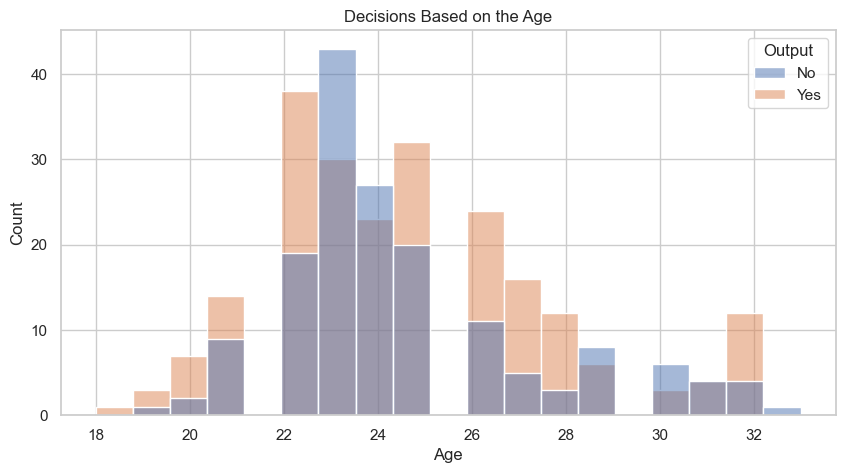

In [28]:
plt.figure(figsize=(10,5))
plt.title("Decisions Based on the Age")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

In [29]:
buying_again_data = data.query("Output == 'Yes'")
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
14,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
15,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive
16,21,Male,Single,Student,No Income,Graduate,4,12.9770,77.5773,560009,Yes,Positive
17,22,Female,Single,Student,No Income,Graduate,4,12.9983,77.6409,560033,Yes,Positive
18,23,Male,Single,Student,No Income,Graduate,4,12.9925,77.5633,560021,Yes,Positive


In [32]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['red','blue']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Income Group')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [158]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,32,0,0,4,0,1,5,12.9820,77.6256,560008,No,0
1,23,0,1,1,0,1,3,12.9820,77.6256,560008,No,0
2,25,1,1,1,0,1,4,12.8988,77.5764,560078,No,0
3,23,0,1,1,0,1,3,12.9820,77.6256,560008,No,0
4,19,1,1,1,0,1,2,13.0019,77.5713,560003,No,0


In [159]:
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

# Logistic Regression

In [160]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.25,random_state=30)

In [161]:
print(data.shape)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(xtest.shape)

(388, 12)
(291, 9)
(97, 9)
(291, 1)
(97, 9)


#### Building the Logistic Regression Model

In [162]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

C:\Users\OFF-LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

#### Model Evaluation

In [163]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)


Accuracy: 0.7422680412371134
Classification_report: 
               precision    recall  f1-score   support

          No       0.72      0.74      0.73        46
         Yes       0.76      0.75      0.75        51

    accuracy                           0.74        97
   macro avg       0.74      0.74      0.74        97
weighted avg       0.74      0.74      0.74        97



In [164]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)


Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 0.7285223367697594
Classification_report: 
               precision    recall  f1-score   support

          No       0.64      0.76      0.69       117
         Yes       0.81      0.71      0.76       174

    accuracy                           0.73       291
   macro avg       0.73      0.73      0.72       291
weighted avg       0.74      0.73      0.73       291



## Decision tree 

In [165]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()


In [166]:
dtr.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [167]:
#testing data evaluation
dtrpredtest=dtr.predict(xtest)
Accuracy = accuracy_score(ytest,dtrpredtest)
print('Accuracy:',Accuracy)

Accuracy: 0.9072164948453608


In [168]:
#training data evaluation
dtrpredtrain=dtr.predict(xtrain)
Accuracy = accuracy_score(ytrain,dtrpredtrain)
print('Accuracy:',Accuracy)

Accuracy: 0.9965635738831615


## Random Forest Classifier

In [169]:
#number of trees in RF
n_estimators = [int(x) for x in np.linspace(start=10,stop=100,num=10)]
#number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth = [2,4,6,8,10,11,13]
#minimum number of samples reqd to split a node
min_samples_split = [2,5]
#minimum number of samples reqd at each leaf node
min_samples_leaf = [1,2]
#method of selecting samples for training each tree
bootstrap = [True,False]

In [170]:
#create the parametr grid (grid search cv)
parameters = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(parameters)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 11, 13], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [171]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

C:\Users\OFF-LAPTOP\AppData\Local\Temp\ipykernel_14140\3401740085.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

### Using GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3, verbose=2, n_jobs=4)

In [100]:
rf_Grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 1120 candidates, totalling 3360 fits


C:\Users\OFF-LAPTOP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 10, 11, 13],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [101]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [102]:
rf_Grid.predict(xtest)

array(['No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No'],
      dtype=object)

In [103]:
rf_Grid.score(xtrain,ytrain)
rf_Grid.score(xtest,ytest)

0.9487179487179487

### Checking Accuracy

In [104]:
print(f'Train Accuracy- :{rf_Grid.score(xtrain,ytrain):.2f}')
print(f'Test Accuracy- : {rf_Grid.score(xtest,ytest):.2f}')

Train Accuracy- :0.99
Test Accuracy- : 0.95


In [105]:
rfmodel = RandomForestClassifier(bootstrap = False,
 max_depth = 4,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators = 100)

rfmodel.fit(xtrain,ytrain)

C:\Users\OFF-LAPTOP\AppData\Local\Temp\ipykernel_14140\469977534.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_split=5)

In [106]:
rfmodel.predict(xtest)
y_predtest=rfmodel.predict(xtest)

cr=classification_report(ytest,y_predtest)
print('cr: \n',cr)

accuracy = accuracy_score(ytest,y_predtest)
print('accuracy: \n',accuracy)

cr: 
               precision    recall  f1-score   support

          No       1.00      0.91      0.95        22
         Yes       0.89      1.00      0.94        17

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39

accuracy: 
 0.9487179487179487


### final

In [174]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))

features = np.array([[a, b, c, d, e, f, g, h, i]])
#print("Finding if the customer will order again: ", model.predict(features))
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 1
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Review of the Last Order (1 = Positive, 0 = Negative): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
Monthly Income: 0
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 1
Pin Code: 1232
Finding if the customer will order again:  ['Yes']


# thank you